# Data Analysis

**<code> by ZaraPhCode</code>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np

## reading the file

First, we open the <code>.xlsx</code> file using the function <code>read_excel</code> from <code>Pandas</code>. It copy the data of the excel file sheets into a dictionary. In roder to read each sheet, we assign a DataFrame to each dictionary key.

In [2]:
xlsx_path = 'KPMG_VI_New_raw_data_update_final.xlsx'
sheet_names = ['Transactions','NewCustomerList','CustomerDemographic','CustomerAddress']
df = []

df_read = pd.read_excel(xlsx_path, sheet_name=None,)
df.append(df_read.get('Transactions'))
df.append(df_read.get('NewCustomerList'))
df.append(df_read.get('CustomerDemographic'))
df.append(df_read.get('CustomerAddress'))

See first elements of the sheet <code>Transactions</code>

In [33]:
df[0].head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


We then rename the columns:

In [3]:
titles = []
for i in range(len(sheet_names)):
    titles.append(list(df[i].iloc[0,:]))
    
for i in range(len(sheet_names)):
    df[i].columns =titles[i]
    df[i] = df[i].loc[1:,:]
    df[i].reset_index(inplace=True)
    df[i] = df[i].iloc[:,1:]  

We now omit the forst row in the dataframe which is the columns name. Then we reindex the dataframe. By doing that, another column will add to the left of dataframe. We should then omit the first column in the resulted dataframe to finilize reading the excel file correctly:

In [4]:
df[0].head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


## Handling missing values

As there is no duplication (see task 1) we first eliminate null rows and null columns and then summerize the data as:

In [4]:
summary_stats = []

for i in range(len(sheet_names)):
    df[i] = df[i].dropna()
    df[i] = df[i].loc[:, ~df[i].columns.isnull()]
    summary_stats.append(df[i].describe())
    print(summary_stats[i])
    print('---------------------------')

        transaction_id  product_id  customer_id     transaction_date  \
count            19445       19445        19445                19445   
unique           19445         101         3492                  364   
top                  1           0         1068  2017-08-18 00:00:00   
freq                 1        1157           14                   81   

       online_order order_status  brand product_line product_class  \
count         19445        19445  19445        19445         19445   
unique            2            2      6            4             3   
top            True     Approved  Solex     Standard        medium   
freq           9739        19273   4169        13920         13587   

       product_size  list_price  standard_cost  product_first_sold_date  
count         19445    19445.00       19445.00                    19445  
unique            3      100.00         103.00                      100  
top          medium     2091.47         388.92                    

In [6]:
print(summary_stats[2].to_markdown())

|        |   customer_id | first_name   | last_name   | gender   |   past_3_years_bike_related_purchases | DOB                 | job_title     | job_industry_category   | wealth_segment   | deceased_indicator   |   default | owns_car   |   tenure |
|:-------|--------------:|:-------------|:------------|:---------|--------------------------------------:|:--------------------|:--------------|:------------------------|:-----------------|:---------------------|----------:|:-----------|---------:|
| count  |          2630 | 2630         | 2630        | 2630     |                                  2630 | 2630                | 2630          | 2630                    | 2630             | 2630                 |      2630 | 2630       |     2630 |
| unique |          2630 | 2234         | 2560        | 4        |                                   100 | 2413                | 195           | 9                       | 3                | 2                    |        90 | 2          |       22 |
| to

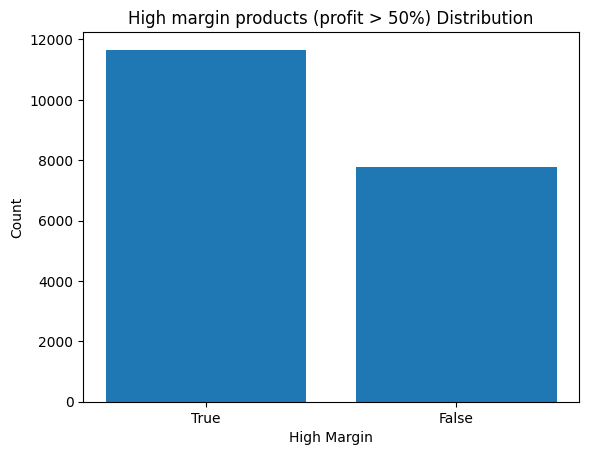

In [8]:
df[0]['high_margin'] = ( df[0]['list_price']  / df[0]['standard_cost'] ) - 1.0
df[0]['high_margin'][df[0]['high_margin'] >= 0.5] = True
df[0]['high_margin'][df[0]['high_margin'] < 0.5] = False


margin_value_counts = df[0]['high_margin'].value_counts()

# Plot the histogram
plt.bar(margin_value_counts.index.astype(str), margin_value_counts.values)
plt.xlabel('High Margin')
plt.ylabel('Count')
plt.title('High margin products (profit > 50%) Distribution')
plt.savefig('margin_dist.png')
plt.show()


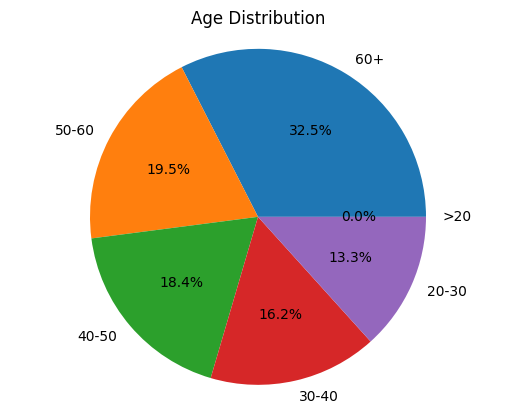

In [6]:
df[2]['age'] = pd.to_datetime(df[2]['DOB'], format='%m %d %y')

# Calculate age based on current date
current_year = datetime.now().year
df[2]['age'] = current_year - df[2]['age'].dt.year

# Define the age categories
age_labels = ['60+','50-60' ,'40-50','30-40', '20-30', '>20']

# Define the age category bins
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]

# Categorize the ages
df[2]['age_category'] = pd.cut(df[2]['age'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences in each category
age_counts = df[2]['age_category'].value_counts()

# Plot the circle plot
plt.pie(age_counts, labels=age_labels, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.axis('equal')

# Display the plot
plt.savefig('age_dist.png')
plt.show()

C:\Users\Zahra Etesami\AppData\Local\Temp\ipykernel_22036\3100036060.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(range(len(most_bought_items)),df[0]['product_id'].value_counts().mean()*range(len(most_bought_items))/range(len(most_bought_items)),'r')


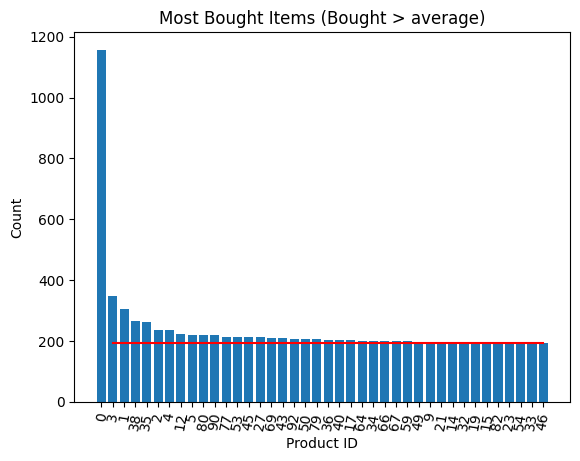

In [35]:
# Count the occurrences of each product_id 
product_counts = df[0]['product_id'].value_counts()

# Filter products that are bought more than 10 times
most_bought_items = product_counts[product_counts > df[0]['product_id'].value_counts().mean()]
# Sort the most_bought_items Series by values
most_bought_items = most_bought_items.sort_values(ascending=False)

# Plot the histogram
plt.bar(range(len(most_bought_items)), most_bought_items.values)
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Most Bought Items (Bought > average)')
plt.xticks(range(len(most_bought_items)), most_bought_items.index, rotation=80)
plt.savefig('producd_id_more_than_average.png')
plt.show()

1688


C:\Users\Zahra Etesami\AppData\Local\Temp\ipykernel_6296\3175169132.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(range(len(most_buyers)),df[0]['customer_id'].value_counts().mean()*range(len(most_buyers))/range(len(most_buyers)),'r')


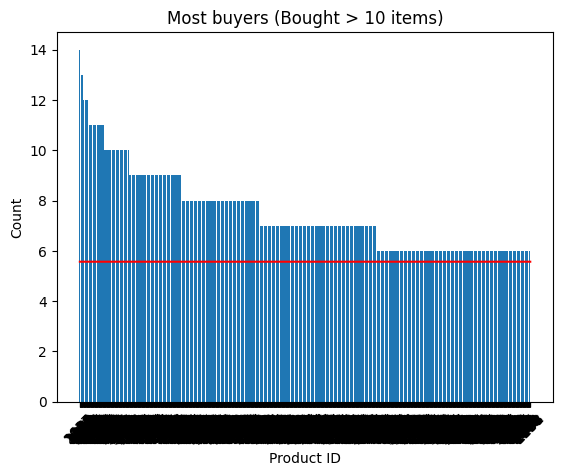

In [25]:
# Count the occurrences of each customer_id in transactions
customer_counts = df[0]['customer_id'].value_counts()
print(len(customer_counts[customer_counts > df[0]['customer_id'].value_counts().mean()]))
# Filter products that are bought more than 10 times
most_buyers = customer_counts[customer_counts > df[0]['customer_id'].value_counts().mean()]
# Sort the most_bought_items Series by values
most_buyers = most_buyers.sort_values(ascending=False)

# Plot the histogram
plt.bar(range(len(most_buyers)), most_buyers.values)
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Most buyers (Bought > 10 items)')
plt.xticks(range(len(most_buyers)), most_buyers.index, rotation=45)
plt.plot(range(len(most_buyers)),df[0]['customer_id'].value_counts().mean()*range(len(most_buyers))/range(len(most_buyers)),'r')
plt.show()

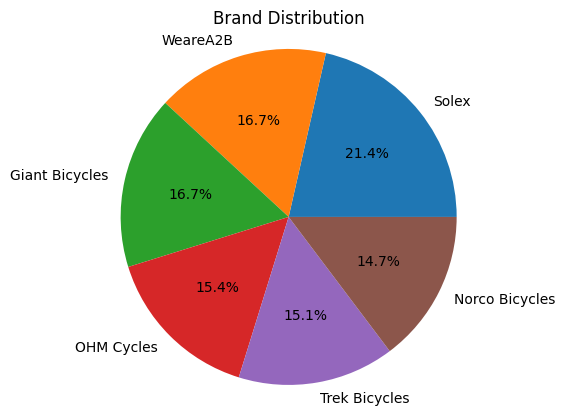

In [30]:
# Count the occurrences of each brand
brand_counts = df[0]['brand'].value_counts()

# Plot the pie chart
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%')
plt.title('Brand Distribution')
plt.axis('equal')
plt.savefig('brand_dist.png')
plt.show()

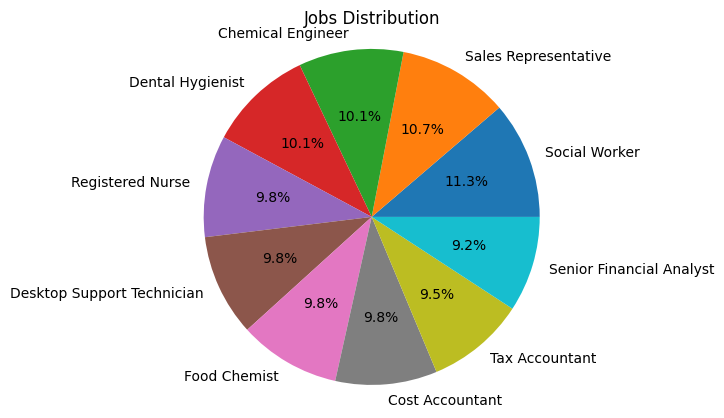

In [29]:
# Count the occurrences of each job_title in CustomerDemographic
job_counts = df[2]['job_title'].value_counts()
most_job_items = job_counts.sort_values(ascending=False)


# top_10_jobs = most_job_items.head(20)

# Group all other job titles as 'others'
# other_jobs_count = job_counts.iloc[20:].sum()
# top_10_jobs['Others'] = other_jobs_count

# Plot the pie chart
# plt.pie(top_10_jobs, labels=top_10_jobs.index, autopct='%1.1f%%')
# plt.title('Top 10 Job Titles')


# Plot the pie chart
plt.pie(most_job_items[:10], labels=most_job_items[:10].index, autopct='%1.1f%%')
plt.title('Jobs Distribution')
plt.axis('equal')
plt.savefig('job_dist.png')
plt.show()

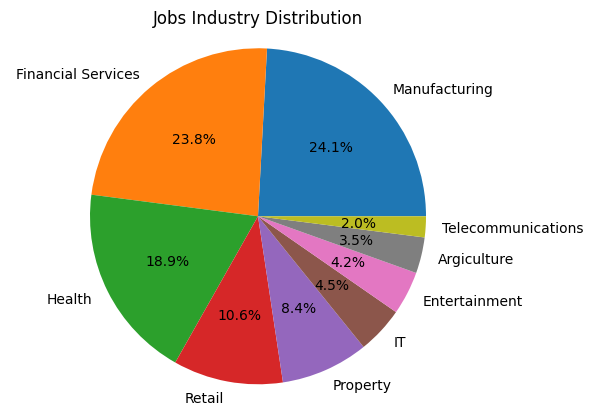

In [47]:
# Count the occurrences of each job_industry_category in CustomerDemographic
job_industry_counts = df[2]['job_industry_category'].value_counts()
most_job_industry_items = job_industry_counts.sort_values(ascending=False)

# Plot the pie chart
plt.pie(most_job_industry_items, labels=most_job_industry_items.index, autopct='%1.1f%%')
plt.title('Jobs Industry Distribution')
plt.axis('equal')
plt.savefig('job_industry_dist.png')
plt.show()

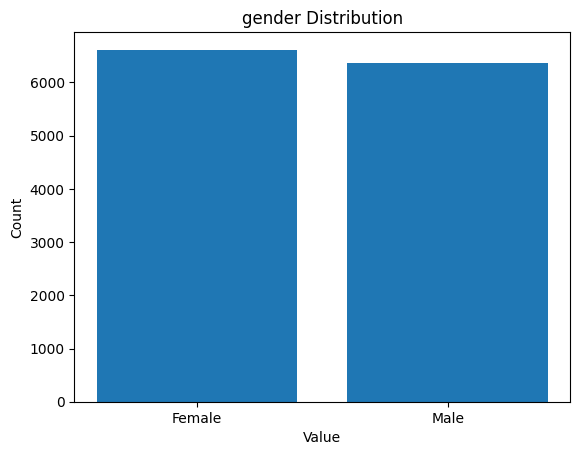

In [53]:
# Replace values in the 'gender' column
df[2]['gender'] = df[2]['gender'].replace(['F', 'femal'], 'female')
gender_mapping = df[2].set_index('customer_id')['gender'].to_dict()

# Add 'gender' column to df1 based on customer_id mapping
df[0]['gender'] = df[0]['customer_id'].map(gender_mapping)
df[0]['gender'] = df[0]['gender'].replace(['F','femal','Femal','female'],'Female')
value_counts = df[0]['gender'].value_counts()

# Plot the histogram
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('gender Distribution')
plt.savefig('gender_dist.png')
plt.show()

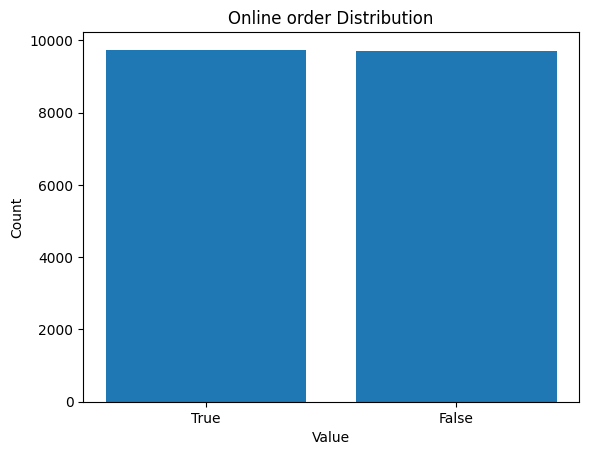

In [54]:
value_counts = df[0]['online_order'].value_counts()

# Plot the histogram
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Online order Distribution')
plt.savefig('online_dist.png')
plt.show()

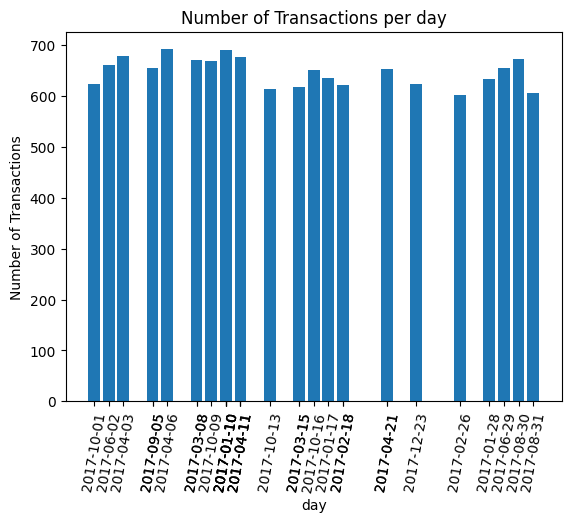

In [42]:
df[0]['transaction_date_datetime'] = pd.to_datetime(df[0]['transaction_date'])

# Extract the year from the transaction_date column
df[0]['transaction_date_datetime'] = df[0]['transaction_date_datetime'].dt.day

# Count the occurrences of each year
day_counts = df[0]['transaction_date_datetime'].value_counts()

# Plot the histogram
# plt.bar(day_counts.index.astype(str), day_counts.values, rotation=45)
plt.bar(df[0]['transaction_date_datetime'].iloc[day_counts.index], day_counts.values)
plt.xlabel('day')
plt.xticks(df[0]['transaction_date_datetime'].iloc[day_counts.index], pd.to_datetime(df[0]['transaction_date'].iloc[day_counts.index]).dt.date, rotation=80)
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per day')
plt.savefig('days_dist.png', bbox_inches='tight')
plt.show()

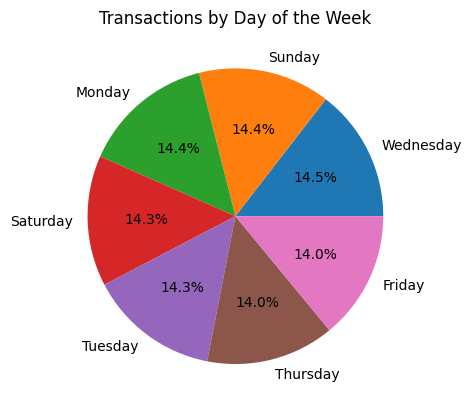

In [44]:
# Convert the 'transaction_date' column to datetime format
df[0]['transaction_date'] = pd.to_datetime(df[0]['transaction_date'])

# Create the 'weekday' column
df[0]['weekday'] = df[0]['transaction_date'].dt.day_name()

# Count the transactions by day of the week
transactions_by_weekday = df[0]['weekday'].value_counts()

# Plot the pie chart
plt.pie(transactions_by_weekday, labels=transactions_by_weekday.index, autopct='%1.1f%%')
plt.title('Transactions by Day of the Week')
plt.savefig('weekday_dist.png', bbox_inches='tight')
plt.show()

In [44]:
top_100_customers.head()

,customer_id,profit
0,941,11668.95
1,2637,11222.65
2,1460,10787.60
3,1558,10640.30
4,3326,10422.04


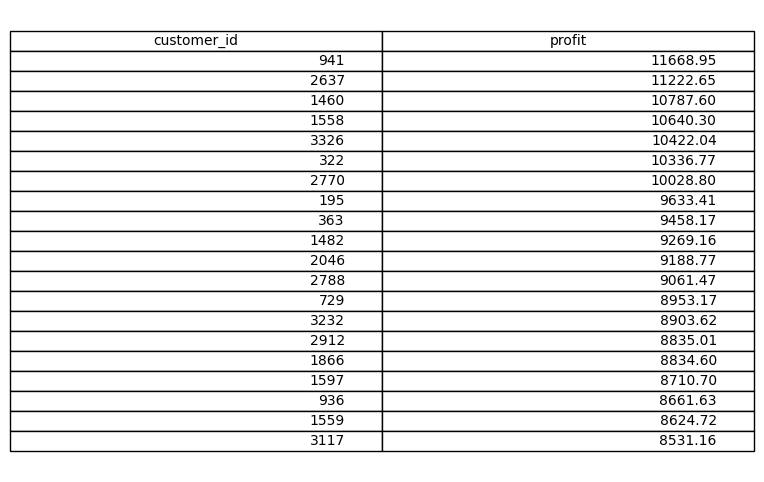

In [69]:
df[0]['profit'] = df[0]['list_price']  - df[0]['standard_cost'] 
df[0]['profit']  = pd.to_numeric(df[0]['profit'] )

total_profit_per_customer = df[0].groupby('customer_id')['profit'].sum().reset_index()

# Sort the customers by profit in descending order and select the top 100
top_20_customers = total_profit_per_customer.nlargest(20, 'profit').reset_index().iloc[:,1:]
top_20_customers['profit'] = top_20_customers['profit'].apply(lambda x: '{:.2f}'.format(x))


plt.figure(figsize=(8, 6))
plt.axis('off')
tbl = plt.table(cellText=top_20_customers.values, colLabels=top_20_customers.columns, loc='center')

# Customize the table appearance
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Set the table title above the table
# title = plt.title('Top 100 Most Profitable Customers', pad=10)
# title.set_y(1.05)
plt.savefig('high_margin_customers.png', bbox_inches='tight')
plt.show()